# Unemployment in Denmark
The main focus for this data project is to train the ability to import external data and use the data for analyses in python.
We chose to investigate the inequality between men and women, as well as how this difference has developed over the past 20 years.
To test the inequality we have imported the dataset “AUL01 - Fuldtidsledige efter område, ydelsestype, a-kasse, alder og køn”, which shows data for fulltime unemployment in Denmark. The data is imported from “Danmarks Statistik”.

# IMPORTANT! 
**Run the cell below in the terminal to have the neccesary package to import the data**

In [1]:
#Installing package to fetch data
%pip install git+https://github.com/alemartinello/dstapi 

  Cloning https://github.com/alemartinello/dstapi to /private/var/folders/5z/bdxpnb0s6qsdq5g3jbq4s7pr0000gn/T/pip-req-build-uvd__9pj
  Running command git clone --filter=blob:none --quiet https://github.com/alemartinello/dstapi /private/var/folders/5z/bdxpnb0s6qsdq5g3jbq4s7pr0000gn/T/pip-req-build-uvd__9pj
  Resolved https://github.com/alemartinello/dstapi to commit d9eeb5a82cbc70b7d63b2ff44d92632fd77123a4
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


Imports and set magics:

In [2]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader
from dstapi import DstApi 
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


# Fetching the data

We chose to use the Dst-Api package to import our data.

In [3]:
# Setting up data-fecthing API
dataind = DstApi('AUL01') # Storing the data as a variable

## Exploring each data set

We start by getting a quick overview of the data

In [4]:
tabsum = dataind.tablesummary(language='en')
display(tabsum) # Displaying the table summary 

Table AUL01: Full-time unemployed persons by region, type of benefits, unemployment insurance fund, age, sex and time
Last update: 2023-04-14T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,OMRÅDE,117,000,All Denmark,997,Abroad,False
1,YDELSESTYPE,5,TOT,Gross unemployment,AKT,Activation of persons on social assistance (pr...,False
2,AKASSE,47,TOT,Total,45,Ikke forsikrede,False
3,ALDER,10,TOT,"Age, total",6099,60 year and over,False
4,KØN,3,TOT,Total,K,Women,False
5,Tid,16,2007,2007,2022,2022,True


In [5]:
### Displaying the values for each variable ###
# for variable in tabsum['variable name']:
    
    # print(variable+':')
    # display(dataind.variable_levels(variable, language='en'))

The intention of displaying the values for each variables in the dataset, is to see the different calling names for wanted columns and rows. We need this information to narrow down the dataset for our analysis.

In [6]:
# Defining base parameters
params = dataind.define_base_params(language='en')
# params 

Cleaning the data - selecting data we want for our analysis.

In [7]:
# Defining the data we want to use
variables = params['variables']
variables[0]['values'] = ['000'] # Area=Denmark
variables[1]['values'] = ['TOT'] # Total unemployment
variables[2]['values'] = ['TOT'] # All UIF
variables[3]['values'] = ['TOT'] # Age
variables[4]['values'] = ['M','K'] # Gender seperated - men and female
variables[5]['values'] = ['>=2007<=2022'] # The whole time period
# params

We chose to look at total unemployment in Denmark and test whether there is an unemployment gap between men and women. How is the unemployment gap for men and women affected by good and bad times regarding the economy? Which group is affected the most?

In [8]:
# Getting modified data
inc_api = dataind.get_data(params=params)
# print(inc_api)

## Creating a plot to visualize the difference in unemployment

/var/folders/5z/bdxpnb0s6qsdq5g3jbq4s7pr0000gn/T/ipykernel_15241/923526126.py:57: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, axis='y', linewidth=0.05, linestyle='-', color='gray')


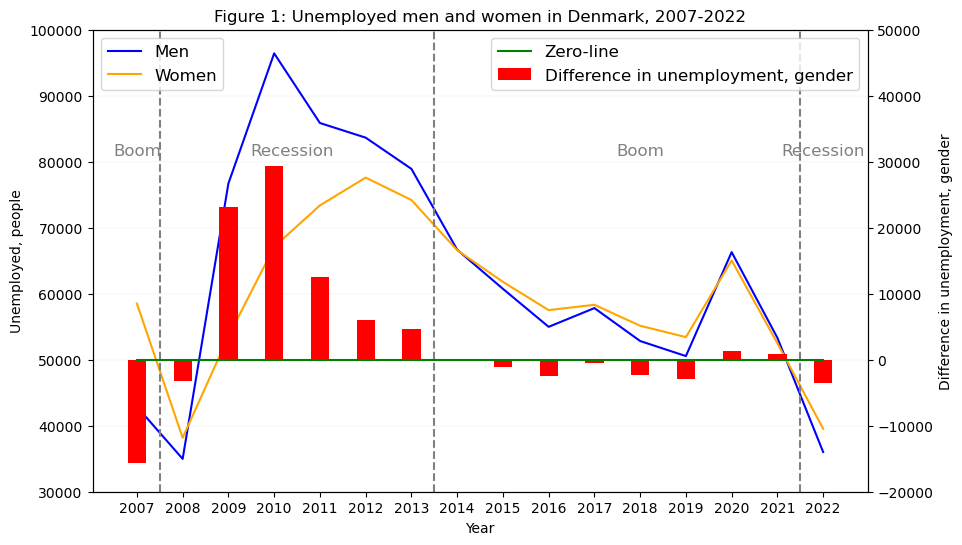

In [10]:
# Pivot the dataframe to create separate columns for men and women
frampivot = inc_api.pivot_table(index='TID', columns='KØN', values='INDHOLD')

# Create column for men
frampivot['MEN'] = frampivot['Men']

# Create column for women
frampivot['WOMEN'] = frampivot['Women']

# Reworking original columns
frampivot = frampivot.drop(columns=['Men', 'Men', 'Women', 'Women'])

# Calculate the difference between men and women
frampivot['Difference'] = frampivot['MEN'] - frampivot['WOMEN']

# Creating the zero-line
frampivot['Zero'] = frampivot['MEN'] - frampivot['MEN']

# Plotting the data as bar charts
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot men and women as bars on the first axis
ax1.plot(frampivot.index, frampivot['MEN'], color='blue', label='Men') # Plotting as lines
ax1.plot(frampivot.index, frampivot['WOMEN'], color='orange', label='Women') # Plotting as linesbars

# Set the x-axis label and ticks
ax1.set_xlabel('Year')
ax1.set_xticks(frampivot.index)

# Set the first y-axis' label and range
ax1.set_ylabel('Unemployed, people')
ax1.set_ylim([30000, 100000])

# Create the title for the figure
ax1.set_title('Figure 1: Unemployed men and women in Denmark, 2007-2022')

# Create legend for the first axis
ax1.legend(loc='upper left', fontsize=12)

# Create a second axis for the difference plot
ax2 = ax1.twinx()

# Plot the difference as a bar on the second axis
ax2.bar(frampivot.index, frampivot['Difference'], width=0.4, align='center', color='red', label='Difference in unemployment, gender') # Plotting as bars

# Plotting the zero-line
ax2.plot(frampivot.index, frampivot['Zero'], color='green', label='Zero-line')

# Set the second y-axis' label and range
ax2.set_ylabel('Difference in unemployment, gender')
ax2.set_ylim([-20000, 50000])

# Create legend for the second axis
ax2.legend(loc='upper right', fontsize=12)

# Add grid lines for y-axis
ax1.grid(b=True, axis='y', linewidth=0.05, linestyle='-', color='gray')

# Set the same y-axis limits for both axes
ax1.set_ylim([30000, 100000])
ax2.set_ylim([-20000, 50000])

# Add vertical lines
ax1.axvline(x=2007.5, color='gray', linestyle='--')
ax1.axvline(x=2013.5, color='gray', linestyle='--')
ax1.axvline(x=2021.5, color='gray', linestyle='--')

# Add labels for the time periods
ax1.text(2007, 81000, 'Boom', color='grey', fontsize=12, ha='center')
ax1.text(2010.4, 81000, 'Recession', color='grey', fontsize=12, ha='center')
ax1.text(2018, 81000, 'Boom', color='grey', fontsize=12, ha='center')
ax1.text(2022, 81000, 'Recession', color='grey', fontsize=12, ha='center')

# Show the plot
plt.show()


# Commenting on the graph

Figure 1 shows the actual unemployment rates for men and women. The unemployment rate can be described as highly volatile and fluctuating between periods.  In concrete terms, unemployment has been steadily decreasing for both groups. However, this comes against the backdrop of an incredibly high level after the financial crisis (and the Covid-19 pandemic). 
Over the 16 periods, unemployment has been highest for women in 8 of the periods, highest for men in 7 of the periods and then there has been one period where unemployment has been the same for both groups (2014). In addition to the fact that unemployment is highly influenced by the business cycle, there is also a trend between how the business cycle affects the structure of the labor market. 
In particular, unemployment for men is severely affected during recessions, where it rises significantly more than unemployment for women.
Conversely, unemployment also falls faster for men when the economy is booming. 

In general, the gap between male and female unemployment is not significant.
However, this is with the exception of the period during the financial crisis, when there was a significant difference in unemployment rates.

**Possible explanations**

First of all, it can be briefly stated that the impact of the business cycle on the labor market comes as a result of society's high and low confidence in the economic situation. When society is hit by a recession, the population's confidence in the general economic situation falls, which causes the consumption ratio to fall and marginal consumption to fall. This means that demand falls and workplaces overproduce and have to make cutbacks. 
And vice versa during a boom, when there is excess demand and jobs have to adjust upwards. 

A possible explanation for why men are affected more severely during a recession could be that men are in more cyclical occupations, cf. STO. 40. These are particularly occupations that fall under the "construction" sector, which is more strongly influenced by the business cycle and the population's confidence to invest. 
In addition to this, in the 2012 Finance Act, a budget law was passed for the government to support the construction sector to help rebuild the workforce. 


2020 sees a large increase in unemployment for both men and women. This increase comes in the context of the Covid-19 pandemic, when society was hit by a lock-down, with shops and all other physical presence being shut down.
This created a large increase in unemployment because there was a huge oversupply compared to demand, but this applied to both the service industry, the construction industry, the private health sector, etc. Thus, it makes sense that the unemployment rate had a similar increase for both men and women. 


# Conclusion

The unemployment gap between men and women has changed a lot over the period studied.
However, the change has been positive both from a societal and gender perspective.
The gap has narrowed significantly, especially compared to the period after the financial crisis, and the general level of unemployment has narrowed significantly over the period, even though society has been affected by global lockdown. 